# 데이터 불러오기 및 전처리

In [5]:
!pip install mglearn

X.shape: (26, 2)


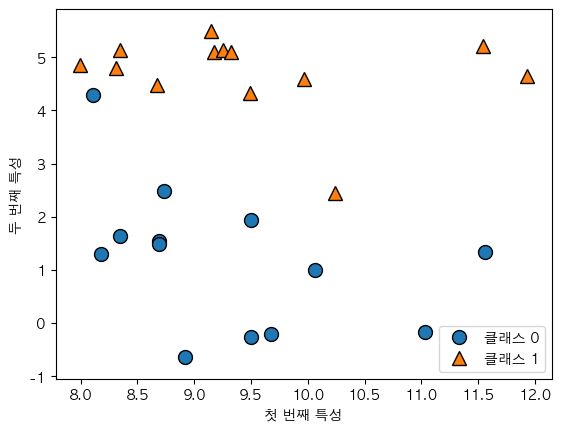

In [20]:
import mglearn
import matplotlib.pyplot as plt

# 한국어 깨짐 방지
plt.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

# dataset 만들기
X, y = mglearn.datasets.make_forge()

# 산점도 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:", X.shape)

Text(0, 0.5, '타깃')

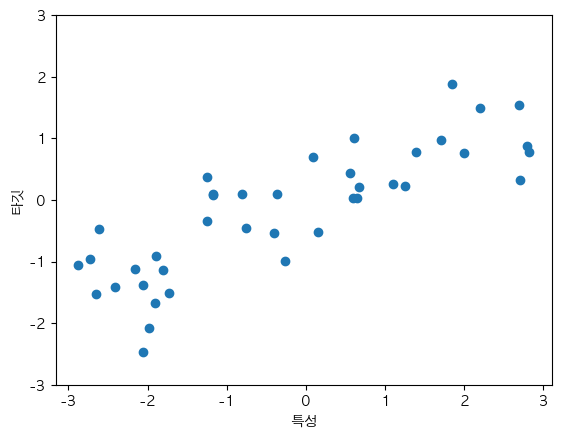

In [27]:
# 회귀 알고리즘 설명을 위한 인위적 wave 데이터셋 생성
# x축->특성, y축->타깃(출력)
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [36]:
# 분류
# 저차원 데이터셋을 사용하기 위해 위스콘신 유방암 데이터를 사용
from sklearn.datasets import load_breast_cancer
import numpy as np

cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

# 데이터: 569, 특성: 30 
print("유방암 데이터의 형태: ", cancer.data.shape)

# 양성: 357, 악성: 212
print("클래스별 샘플 개수:\n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

# 특성 이름
print("특성 이름:\n", cancer.feature_names)


cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
유방암 데이터의 형태:  (569, 30)
클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}
특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [41]:
# 회귀
# 보스턴 주택가격 데이터셋 사용
import pandas as pd

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

print("데이터의 형태:", data.shape)

데이터의 형태: (506, 13)


In [43]:
# 특성 공학(feature engineering)을 적용한 데이터 불러오기
# 13개의 원래 특성에 13개에서 2개씩(중복 포함) 짝지은 91개의 특성을 더해 104개가 됨
X, y = mglearn.datasets. load_extended_boston()
print ("X. shape:", X.shape)

X. shape: (506, 104)


# k-Nearest Neighbors 알고리즘

### 분류

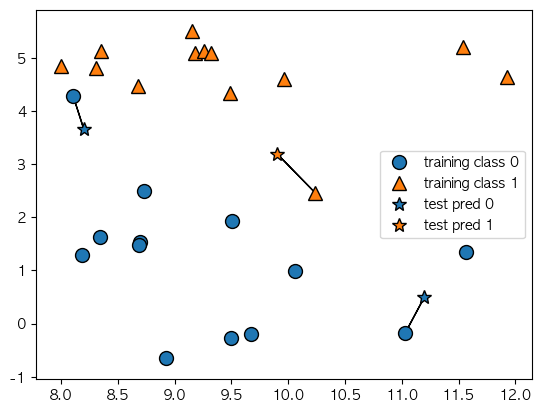

In [44]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

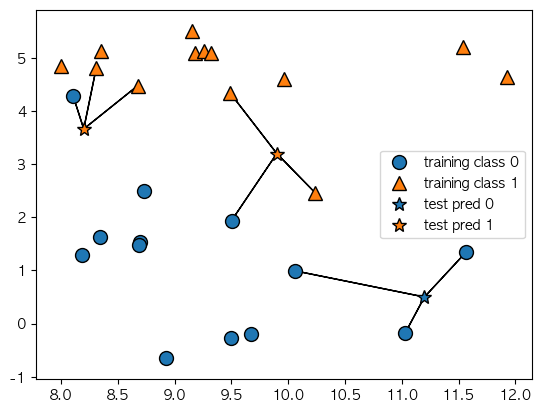

In [45]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [47]:
# 훈련, 테스트 데이터 나누기
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [50]:
# 훈련 데이터로 분류 모델을 학습시키기 (k=3)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
# 예측하기
print("테스트세트 예측:", clf.predict(X_test))

테스트세트 예측: [1 0 1 0 1 0 0]


In [52]:
# 평가하기
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


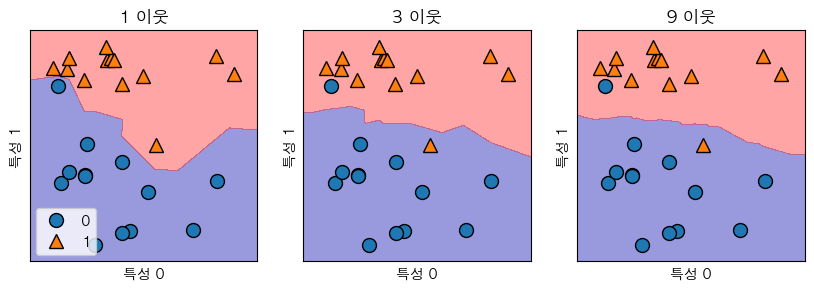

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

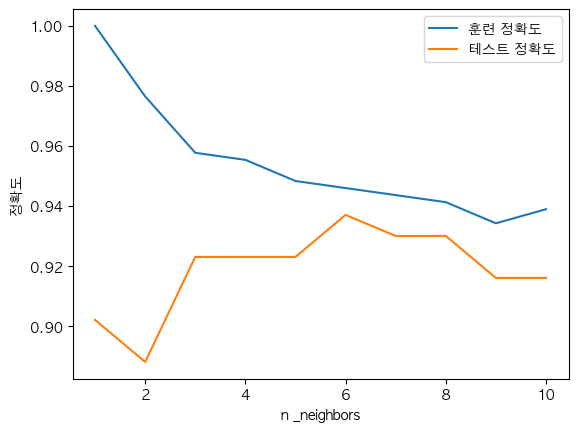

In [68]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n _neighbors")
plt.legend()

### 회귀

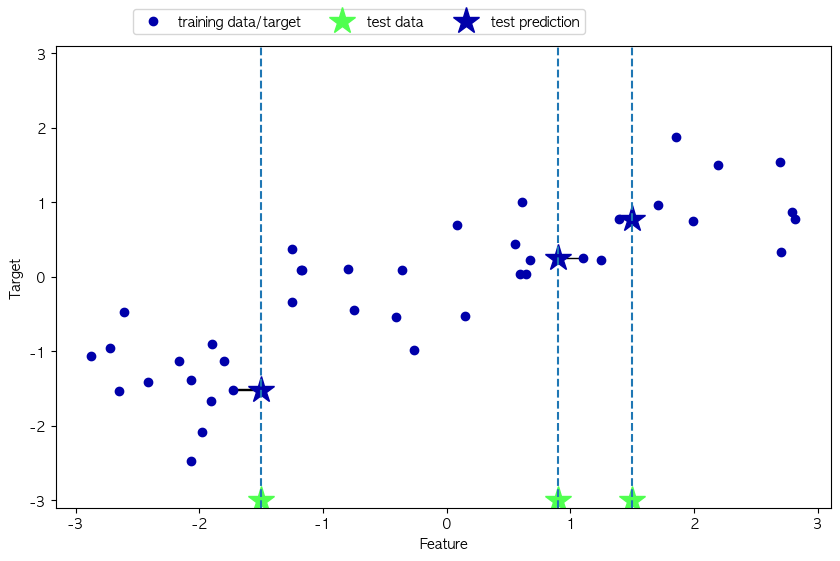

In [69]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [74]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터 훈련, 테스트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# k를 3으로 설정해서 모델 객체 생성
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련데이터와 타깃을 사용해 모델 학슴
reg. fit(X_train, y_train)

print("테스트 세트 예측:\n", reg.predict(X_test))
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 세트 R^2: 0.83


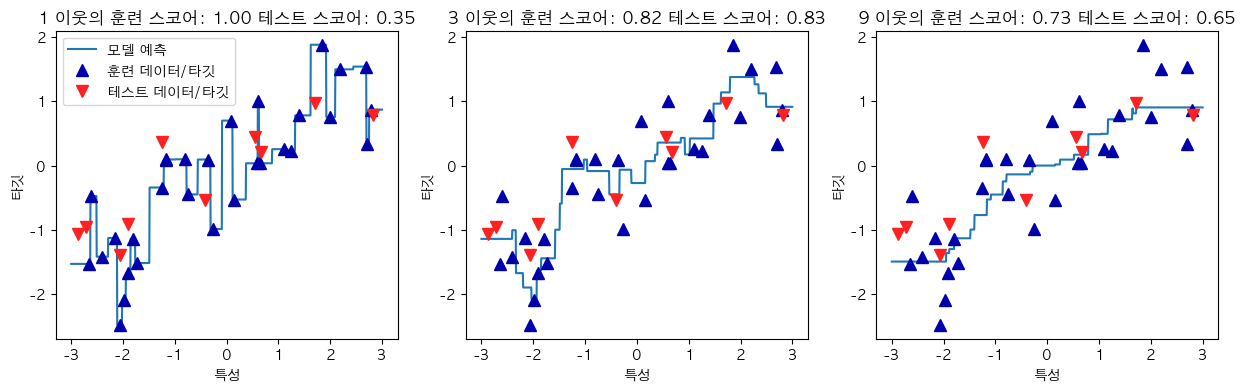

In [77]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3과 3 사이에 1,000개의 데이터를 만듬
line = np. linspace(-3, 3, 1000). reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg. fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn. cm2(1), markersize=8)
    ax.set_title("{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))

    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

In [ ]:
### 분류

# 선형(Linear) 모델

### 분류